# Cap√≠tulo 13: Redes Neurais Convolucionais (CNNs)

Este cap√≠tulo, do livro "Hands-On Machine Learning with Scikit-Learn & TensorFlow" de Aur√©lien G√©ron, dedica-se √†s **Redes Neurais Convolucionais (CNNs)**, explicando sua origem, componentes fundamentais e arquiteturas not√°veis.

## 1. Origem e Inspira√ß√£o das CNNs

*   As CNNs foram inspiradas no **c√≥rtex visual do c√©rebro**, com base nas descobertas de David H. Hubel e Torsten Wiesel sobre os campos receptivos locais dos neur√¥nios visuais.
*   Essa pesquisa sugeriu que os neur√¥nios de n√≠veis superiores combinam padr√µes de neur√¥nios de n√≠veis inferiores, formando uma hierarquia para detec√ß√£o de padr√µes complexos.
*   Marcos importantes na sua evolu√ß√£o incluem o **neocognitron (1980)** e o trabalho de **Yann LeCun (1998)**.
*   As CNNs s√£o amplamente aplicadas em **reconhecimento de imagem**, mas tamb√©m em reconhecimento de voz e processamento de linguagem natural (PNL).

## 2. A Camada Convolucional: Bloco Fundamental

A **camada convolucional** √© o componente mais crucial de uma CNN.

*   **Campos Receptivos Locais**: Neur√¥nios nesta camada n√£o se conectam a todos os pixels da imagem de entrada (como em DNNs totalmente conectadas), mas apenas a uma pequena √°rea dentro de seus campos receptivos locais. Isso permite focar em **caracter√≠sticas de baixo n√≠vel** (como bordas e linhas) nas camadas iniciais e combin√°-las em caracter√≠sticas de alto n√≠vel nas camadas mais profundas.
*   **Preenchimento de Zeros (Zero Padding)**: Adiciona zeros ao redor das bordas da imagem para garantir que a camada de sa√≠da tenha a mesma altura e largura que a entrada, ou para controlar o tamanho.
*   **Passo (Stride)**: Define a dist√¢ncia entre campos receptivos consecutivos. Um passo maior resulta na redu√ß√£o da dimensionalidade da sa√≠da.
*   **Filtros (ou Kernels de Convolu√ß√£o)**: S√£o pequenas imagens que representam os pesos de um neur√¥nio. Eles detectam padr√µes espec√≠ficos (por exemplo, linhas verticais ou horizontais) e geram **mapas de caracter√≠sticas** (feature maps) que destacam regi√µes da imagem semelhantes ao filtro.
*   **Compartilhamento de Par√¢metros**: Todos os neur√¥nios em um mesmo mapa de caracter√≠sticas **compartilham os mesmos pesos e vi√©s**. Essa t√©cnica reduz drasticamente o n√∫mero de par√¢metros do modelo e permite que a CNN reconhe√ßa um padr√£o em qualquer local da imagem.
*   **Hiperpar√¢metros**: Os hiperpar√¢metros de uma camada convolucional incluem o n√∫mero e as dimens√µes (altura e largura) dos filtros, o passo e o tipo de preenchimento.
*   **Implementa√ß√£o em TensorFlow**: A fun√ß√£o `tf.nn.conv2d()` √© usada para criar uma camada convolucional.

## 3. A Camada de Pooling

A **camada de pooling** desempenha um papel importante na redu√ß√£o da dimensionalidade.

*   **Objetivos**: Reduz a dimensionalidade, o custo computacional e o uso de mem√≥ria, ao mesmo tempo em que aumenta a robustez da rede a pequenas distor√ß√µes ou transla√ß√µes de caracter√≠sticas (invari√¢ncia a caracter√≠sticas).
*   **Opera√ß√£o**: Neur√¥nios de pooling n√£o possuem pesos. Eles agregam as entradas de seus campos receptivos locais usando uma fun√ß√£o de agrega√ß√£o, como o **m√°ximo (max pooling)** ou a **m√©dia (average pooling)**.
*   **Implementa√ß√£o em TensorFlow**: A fun√ß√£o `tf.nn.max_pool()` √© utilizada para a opera√ß√£o de max pooling.

## 4. Arquiteturas T√≠picas e Not√°veis de CNNs

As CNNs geralmente empilham camadas convolucionais (frequentemente seguidas por uma camada ReLU) e camadas de pooling. A imagem de entrada diminui de tamanho, mas se torna mais "profunda" (com mais mapas de caracter√≠sticas). No topo dessa pilha, uma rede neural feedforward regular (com camadas densamente conectadas e ReLUs) √© adicionada, culminando em uma camada final (por exemplo, Softmax) para a previs√£o.

O cap√≠tulo destaca v√°rias arquiteturas de CNNs espec√≠ficas:

*   **LeNet-5 (1998)**: Uma das primeiras arquiteturas de CNNs. Foi utilizada para reconhecimento de d√≠gitos manuscritos (MNIST).
*   **AlexNet (2012)**: Vencedora do ILSVRC 2012. Significativamente maior e mais profunda que a LeNet-5, foi a primeira a empilhar camadas convolucionais diretamente e introduziu t√©cnicas como **dropout** (com 50% de taxa) e **aumento de dados** para regulariza√ß√£o.
*   **GoogLeNet (2014)**: Vencedora do ILSVRC 2014, atingindo uma taxa de erro top-5 abaixo de 7%. Sua inova√ß√£o central s√£o os **m√≥dulos de Inception**.
    *   **M√≥dulos de Inception**: Permitem que a rede seja mais profunda com menos par√¢metros. Eles executam convolu√ß√µes de diferentes tamanhos (1x1, 3x3, 5x5) e max pooling em paralelo, concatenando os resultados.
    *   **Camadas Gargalo (Bottleneck Layers)**: Convolu√ß√µes de 1x1 s√£o usadas para reduzir a dimensionalidade antes das convolu√ß√µes maiores, o que melhora a efici√™ncia computacional.
    *   **Global Average Pooling**: Substitui as camadas densamente conectadas no topo da rede, reduzindo significativamente o n√∫mero de par√¢metros.
*   **ResNet (Rede Residual) (2015)**: Vencedora do ILSVRC 2015, com redes extremamente profundas (por exemplo, 152 camadas).
    *   **Conex√µes de Salto (Skip Connections) / Atalhos**: A principal inova√ß√£o que permite o treinamento de redes muito profundas. Isso for√ßa a rede a modelar o *res√≠duo* ($f(x) = h(x) - x$) em vez da fun√ß√£o completa ($h(x)$), acelerando o treinamento e mitigando o problema de gradientes que desaparecem.

Outras arquiteturas mencionadas incluem **VGGNet** (vice-campe√£ do ILSVRC 2014) e **Inception-v4** (que combina ideias de GoogLeNet e ResNet).

## 5. Outras Tarefas Visuais com CNNs

CNNs tamb√©m s√£o aplicadas em outras tarefas visuais importantes:

*   **Detec√ß√£o e Localiza√ß√£o de Objetos**: A rede pode gerar caixas delimitadoras ao redor de objetos na imagem, al√©m de identificar suas classes.
*   **Segmenta√ß√£o de Imagem**: A rede classifica cada pixel da imagem de entrada, resultando em uma imagem de sa√≠da onde cada pixel indica a classe do objeto a que pertence.

## 6. Opera√ß√µes de Convolu√ß√£o em TensorFlow

TensorFlow oferece outras opera√ß√µes para camadas convolucionais, como `conv1d()` para entradas 1D (√∫teis em PNL) e `deconv2d()` (tamb√©m conhecida como `conv2d_transpose()`) para deconvolu√ß√µes, embora o nome "deconvolu√ß√£o" seja um tanto enganoso.

### Implementa√ß√£o

In [9]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#Carrega imagens amostrais
dataset = load_sample_images()
china = dataset.images[0]
flower = dataset.images[1]

# Criar seu array
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

print(f"Batch size: {batch_size}, Dimens√µes: {height}x{width}, Canais: {channels}")


Batch size: 2, Dimens√µes: 427x640, Canais: 3


In [4]:
#cria dois filtros

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #linha vertical
filters[3, :, :, 1] = 1 #linha horizontal

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step


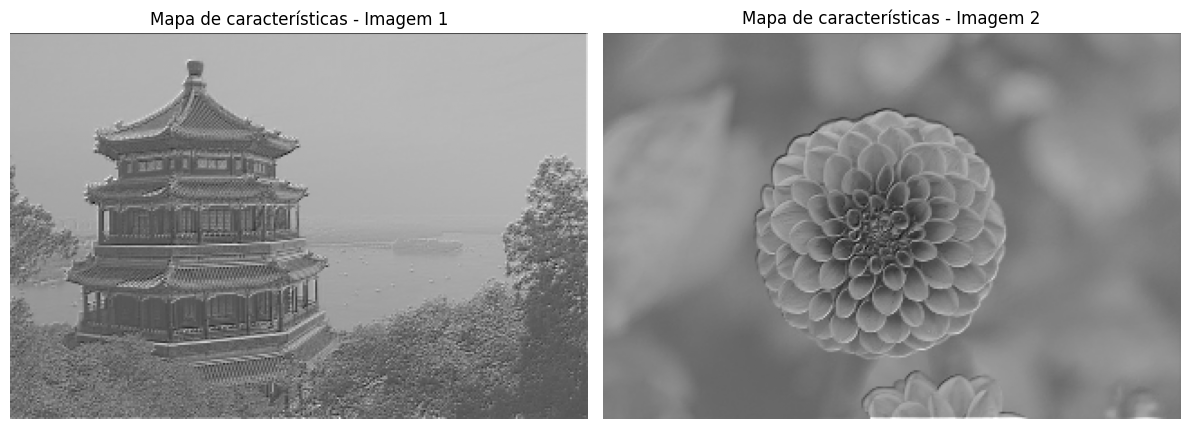


Forma da entrada: (2, 427, 640, 3)
Forma dos filtros: (3, 3, 3, 16)
Forma da sa√≠da (Keras): (2, 214, 320, 16)
Forma da sa√≠da (tf.nn.conv2d): (2, 214, 320, 16)


In [16]:
# Normalizar as imagens se necess√°rio
dataset = dataset / 255.0

# Definir os filtros (kernel)
filters = tf.random.normal([3, 3, channels, 16])  # 16 filtros 3x3

# Usando Keras Layers (Recomendado)
inputs = tf.keras.Input(shape=(height, width, channels))
conv_layer = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=2,
    padding="same",
    use_bias=False
)

# Construir a camada e definir os pesos manualmente
conv_layer.build(inputs.shape)
conv_layer.set_weights([filters])

# Aplicar a convolu√ß√£o
convolution = conv_layer(inputs)

# Criar modelo
model = tf.keras.Model(inputs=inputs, outputs=convolution)

# Fazer a predi√ß√£o
output = model.predict(dataset)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.title("Mapa de caracter√≠sticas - Imagem 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output[1, :, :, 1], cmap="gray")
plt.title("Mapa de caracter√≠sticas - Imagem 2")
plt.axis('off')

plt.tight_layout()
plt.show()

# Informa√ß√µes sobre as sa√≠das
print(f"\nForma da entrada: {dataset.shape}")
print(f"Forma dos filtros: {filters.shape}")
print(f"Forma da sa√≠da (Keras): {output.shape}")
print(f"Forma da sa√≠da (tf.nn.conv2d): {output_nn.shape}")

In [18]:
inputs = tf.keras.Input(shape=(height, width, channels))
conv = tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=7,
    strides=2,  # pode ser um inteiro ou (2, 2)
    padding="same"
)(inputs)

# Criar o modelo
model = tf.keras.Model(inputs=inputs, outputs=conv)

# Usar o modelo para fazer previs√µes
output = model.predict(dataset)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step


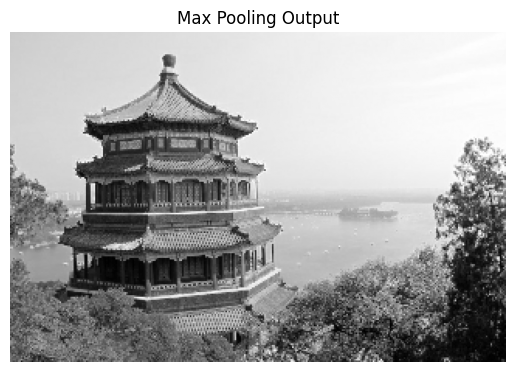

In [21]:
dataset = dataset / 255.0  # Normalizar

# Max Pooling simplificado
max_pool_layer = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid')
output = max_pool_layer(dataset)

# Visualizar
plt.imshow(np.mean(output[0], axis=-1), cmap='gray')
plt.title('Max Pooling Output')
plt.axis('off')
plt.show()

### Exerc√≠cios

1. Quais s√£o as vantagens de uma CNN sobre uma DNN totalmente conectada para a classifica√ß√£o de imagens?

As Redes Neurais Convolucionais (CNNs) apresentam v√°rias vantagens significativas sobre as Redes Neurais Densas (DNNs) totalmente conectadas para classifica√ß√£o de imagens.

A principal vantagem √© a preserva√ß√£o da estrutura espacial das imagens. As CNNs mant√™m a organiza√ß√£o bidimensional dos pixels atrav√©s de opera√ß√µes de convolu√ß√£o, enquanto as DNNs achatam a imagem em um vetor unidimensional, perdendo informa√ß√µes espaciais cruciais.

As CNNs s√£o computacionalmente mais eficientes devido ao compartilhamento de par√¢metros. Elas utilizam os mesmos filtros convolucionais em toda a imagem, drasticamente reduzindo o n√∫mero de par√¢metros necess√°rios comparedo √†s DNNs totalmente conectadas, onde cada neur√¥nio se conecta a todos os pixels da camada anterior.

Outra vantagem fundamental √© a invari√¢ncia translacional. As CNNs podem reconhecer padr√µes independentemente de sua posi√ß√£o na imagem, enquanto as DNNs tratam cada pixel como uma feature independente sem no√ß√£o de proximidade espacial.

As CNNs tamb√©m possuem uma capacidade inerente de aprendizado hier√°rquico de features. As camadas iniciais aprendem features simples como bordas e texturas, camadas intermedi√°rias aprendem formas e partes de objetos, e camadas finais aprendem objetos completos.

Finalmente, as CNNs apresentam melhor regulariza√ß√£o natural devido ao menor n√∫mero de par√¢metros e √†s opera√ß√µes de pooling, reduzindo significativamente o overfitting comparedo √†s DNNs totalmente conectadas, que s√£o mais propensas a memorizar os dados de treinamento.

2. Considere uma CNN composta por tr√™s camadas convolucionais, cada uma com kernel 3x3, um stride de 2 e padding SAME. A camada inferior gera 100 mapas, a do meio gera 200 e a de cima 400. As imagens de entrada s√£o RGB de 200x300 pixels. Qual √© o n√∫mero total de par√¢metros na CNN? Se estivermos utilizando floats de 32 bits, quanto de RAM essa rede exigir√° ao fazer uma previs√£o para uma √∫nica inst√¢ncia? E quando treinamos em um minilote de 50 imagens?

**A. Par√¢metros:**
- Camada 1: 100 filtros, cada um com 3x3x3+1 = 28 par√¢metros ‚Üí 2.800
- Camada 2: 200 filtros, cada um com 3x3x100+1 = 901 par√¢metros ‚Üí 180.200
- Camada 3: 400 filtros, cada um com 3x3x200+1 = 1.801 par√¢metros ‚Üí 720.400
- Total: 2.800 + 180.200 + 720.400 = **903.400 par√¢metros**
 
**B. RAM para previs√£o de 1 imagem:**
- Par√¢metros: 903.400 √ó 4 bytes = 3,45 MB
- Ativa√ß√µes: entrada (0,7 MB), sa√≠da 1¬™ camada (6 MB), 2¬™ (3 MB), 3¬™ (1,5 MB) ‚Üí Total ativa√ß√µes ‚âà 10,7 MB
- Total ‚âà **14,2 MB**
 
**C. RAM para minilote de 50 imagens:**
- Ativa√ß√µes: 10,7 MB √ó 50 = 535 MB
- Par√¢metros: 3,45 MB
- Total ‚âà **538,5 MB**

3. Se sua GPU ficar sem mem√≥ria durante o treinamento de uma CNN, quais s√£o cinco coisas que voc√™ poderia tentar para resolver?

- Reduzir o tamanho do minilote (batch size).
- Diminuir a resolu√ß√£o das imagens de entrada.
- Simplificar a arquitetura (menos camadas ou menos filtros por camada).
- Utilizar t√©cnicas de checkpointing de ativa√ß√£o (activation checkpointing).
- Usar modelos mais leves (MobileNet, EfficientNet, etc.) ou quantiza√ß√£o dos pesos.
- Se poss√≠vel, utilizar uma GPU com mais mem√≥ria ou treinar em m√∫ltiplas etapas (gradient accumulation).

4. Por que voc√™ adicionaria uma camada max pooling em vez de uma camada convolucional com o mesmo stride?

Adicionar uma camada de max pooling em vez de uma camada convolucional com o mesmo stride pode ser vantajoso pelos seguintes motivos:

1. **Redu√ß√£o de Dimensionalidade Simples**: A camada de max pooling reduz a dimensionalidade da entrada de forma eficiente, mantendo as caracter√≠sticas mais importantes (valores m√°ximos) em cada regi√£o, enquanto uma camada convolucional pode introduzir mais par√¢metros e complexidade.

2. **Invari√¢ncia a Pequenas Transla√ß√µes**: Max pooling ajuda a tornar a rede mais robusta a pequenas transla√ß√µes ou distor√ß√µes nos dados de entrada, pois seleciona o valor m√°ximo em cada regi√£o, ignorando pequenas varia√ß√µes.

3. **Menor Custo Computacional**: Max pooling n√£o possui pesos trein√°veis, o que reduz o custo computacional e a mem√≥ria necess√°ria, enquanto uma camada convolucional adiciona pesos que precisam ser otimizados durante o treinamento.

4. **Evitar Overfitting**: Como max pooling n√£o aprende par√¢metros, ele atua como uma forma de regulariza√ß√£o, reduzindo a chance de overfitting, especialmente em redes profundas.

5. **Simplicidade**: Max pooling √© uma opera√ß√£o mais simples e direta para reduzir a resolu√ß√£o espacial, enquanto uma camada convolucional pode introduzir complexidade adicional ao aprendizado.

5. Quando voc√™ adicionaria uma camada de normaliza√ß√£o de resposta local?

A camada de normaliza√ß√£o de resposta local (LRN) era usada principalmente em arquiteturas antigas, como AlexNet, para ajudar a destacar neur√¥nios com ativa√ß√µes altas e inibir vizinhos, promovendo competi√ß√£o local. Voc√™ adicionaria uma LRN logo ap√≥s camadas convolucionais (geralmente ap√≥s a ativa√ß√£o ReLU) quando quiser aumentar a generaliza√ß√£o e a invari√¢ncia a mudan√ßas de ilumina√ß√£o ou contraste, especialmente em tarefas de vis√£o com imagens naturais. Hoje, √© pouco usada, pois t√©cnicas como batch normalization costumam ser mais eficazes.

6. Voc√™ pode citar as principais inova√ß√µes na AlexNet em compara√ß√£o com LeNet-5? E as principais inova√ß√µes da GoogLeNet e da ResNet?

**Principais inova√ß√µes na AlexNet em compara√ß√£o com LeNet-5:**

1. **Profundidade e Tamanho**: AlexNet √© significativamente maior e mais profunda que LeNet-5, com mais camadas convolucionais e filtros maiores.
2. **ReLU como Fun√ß√£o de Ativa√ß√£o**: Introduziu a fun√ß√£o de ativa√ß√£o ReLU, que acelera o treinamento em compara√ß√£o com fun√ß√µes sigmoides ou tanh.
3. **Dropout**: Utilizou dropout para regulariza√ß√£o, reduzindo o overfitting.
4. **Aumento de Dados**: Aplicou t√©cnicas de aumento de dados, como transla√ß√µes e rota√ß√µes, para melhorar a generaliza√ß√£o.
5. **Treinamento em GPUs**: Foi uma das primeiras redes a aproveitar GPUs para acelerar o treinamento.
6. **Normaliza√ß√£o de Resposta Local (LRN)**: Implementou LRN para melhorar a generaliza√ß√£o.

**Principais inova√ß√µes da GoogLeNet:**

1. **M√≥dulos de Inception**: Introduziu m√≥dulos de Inception, que combinam convolu√ß√µes de diferentes tamanhos e pooling em paralelo, reduzindo o n√∫mero de par√¢metros.
2. **Camadas Gargalo (Bottleneck)**: Usou convolu√ß√µes 1x1 para reduzir a dimensionalidade antes de convolu√ß√µes maiores, melhorando a efici√™ncia computacional.
3. **Global Average Pooling**: Substituiu as camadas densamente conectadas no topo da rede, reduzindo significativamente os par√¢metros.
4. **Profundidade com Efici√™ncia**: Tornou poss√≠vel redes mais profundas sem aumentar drasticamente os par√¢metros.

**Principais inova√ß√µes da ResNet:**

1. **Conex√µes de Salto (Skip Connections)**: Introduziu conex√µes residuais, permitindo que redes muito profundas sejam treinadas ao modelar o res√≠duo em vez da fun√ß√£o completa.
2. **Treinamento de Redes Profundas**: Mitigou o problema de gradientes que desaparecem, permitindo redes com mais de 100 camadas.
3. **Simplicidade**: Manteve uma arquitetura simples e eficiente, com blocos residuais f√°ceis de implementar.

7. Construa sua pr√≥pria CNN e tente atingir a maior precis√£o poss√≠vel no MNIST

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_5 (Conv2D)               ‚îÇ (None, 26, 26, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 26, 26, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_6 (Conv2D)               ‚îÇ (None, 24, 24, 32)     ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 24, 24, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 12, 12, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 12, 12, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_7 (Conv2D)               ‚îÇ (None, 10, 10, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 10, 10, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_8 (Conv2D)               ‚îÇ (None, 8, 8, 64)       ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 8, 8, 64)       ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 54ms/step - accuracy: 0.8963 - loss: 0.4345 - val_accuracy: 0.9446 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 2/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 54ms/step - accuracy: 0.8963 - loss: 0.4345 - val_accuracy: 0.9446 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 2/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 54ms/step - accuracy: 0.9664 - loss: 0.1971 - val_accuracy: 0.9867 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 3/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 54ms/step - accuracy: 0.9664 - loss: 0.1971 - val_accuracy: 0.9867 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 3/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 57ms/step - accuracy: 0.9758 - loss: 0.1636 - val_accuracy: 0.9915 - val_loss: 0.1085 - learning_rate: 0.0010
Epoch 4/50
469/469 ‚îÅ‚îÅ‚îÅ‚î

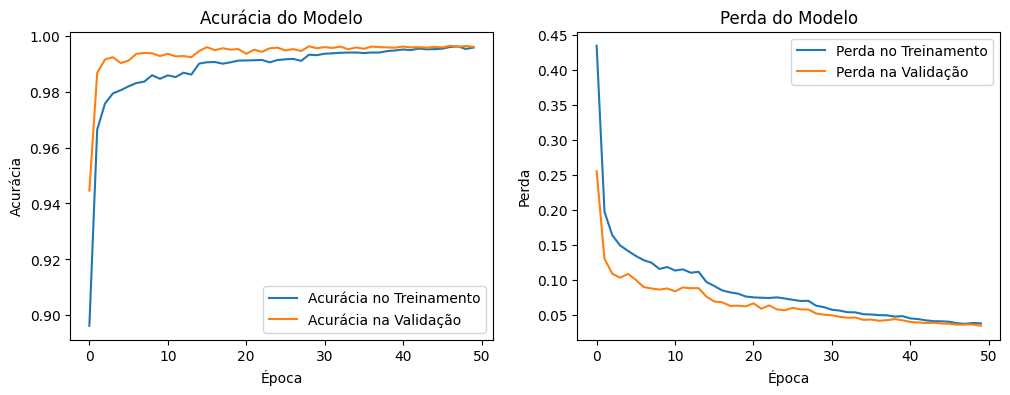

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 123ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 123ms/step


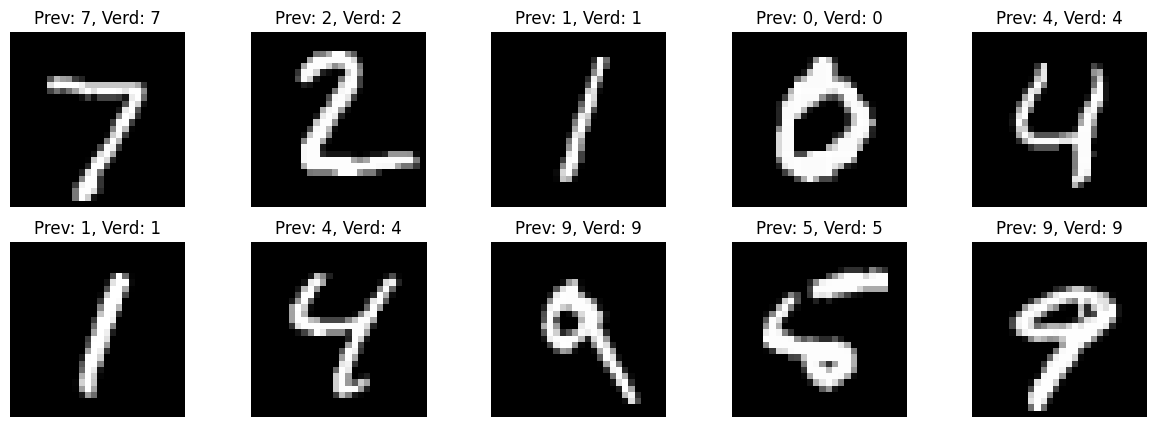

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Redimensionar para adicionar o canal (imagens em tons de cinza)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Converter labels para one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation para melhorar generaliza√ß√£o
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Construir a CNN
model = models.Sequential()

# Primeiro bloco convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        kernel_regularizer=regularizers.l2(1e-4),
                        input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Segundo bloco convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Camadas fully connected
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Exibir arquitetura do modelo
model.summary()

# Callbacks para melhor treinamento
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

# Treinar o modelo
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks,
                    verbose=1)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nAcur√°cia no conjunto de teste: {test_acc:.4f}')

# Plotar hist√≥rico de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acur√°cia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acur√°cia na Valida√ß√£o')
plt.title('Acur√°cia do Modelo')
plt.xlabel('√âpoca')
plt.ylabel('Acur√°cia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Valida√ß√£o')
plt.title('Perda do Modelo')
plt.xlabel('√âpoca')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Fazer previs√µes em algumas imagens de teste
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Exibir algumas previs√µes
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prev: {predicted_classes[i]}, Verd: {true_classes[i]}')
    plt.axis('off')
plt.show()

8. Classificando imagens grandes utilizando o Inception V3.
    
    A. Baixe algumas imagens de v√°rios animais. Carregue-as no Python, por exemplo, utilizando a fun√ß√£o matplotlib.image.mpimg.imread() ou a fun√ß√£o scipy.misc.imread(). Redimensione e/ou corte-as em 299x299 pixels e garanta que elas tenham apenas tr√™s canais (RGB), sem o de transpar√™ncia. As imagens que foram treinadas no modeelo Inception foram pr√©-processadas para que seus valores variarem de -1,0 a 1,0, ent√£o voc√™ deve garantir isso tamb√©m para as suas.
    
    B. Fa√ßa o download do modelo mais recente do Inception v3: o ponto de verifica√ß√£o est√° disponpivel em https://google.gl/25uDF7. A lista dos nomes das classes est√° dispon√≠vel em https://goo.gl/brXRtZ, mas voc√™ deve inserir uma classe "background" no inicio.
    
    C. Crie o modelo Inception v3 chamando a fun√ß√£o inception_v3(), como mostrado abaixo. Isto deve ser feito dentro de um escopo do argumento criado pela fun√ß√£o inception_v3_arg_scope(). Voc√™ tamb√©m deve configurar is_training=False e num_classes=1001 da seguinte forma:

        from tensorflow.contrib.slim.nets import inception
        import tensorflow.contrib.slim as slim

        X = tf.placeholder(tf.float32, shape=[None,299,299,3], name="X")
        with slim.arg_scope(inception.inception_v3_arg_scope()):
            logits, end_points = inception.inception_v3(
                X, num_classes=1001, istraining=Flase)
        predictions = end_points['Predictions']
        saver = tf.train.Saver()

    D. Abra uma sess√£o e utilizar o Saver para restaurar o ponto de verifica√ß√£o do modelo pr√©-treinado que voc√™ baixou anteriormente.
    E. Execute o modelo para classificar as imagens que voc√™ preparou. Exiba as cinco principais previs√µes para cada imagem junto com a probabilidade estimada. Qual √© a acur√°cia do modelo?

CLASSIFICA√á√ÉO DE IMAGENS COM INCEPTION V3
Procurando imagens espec√≠ficas...
‚úì Encontrada: American_Eskimo_Dog.jpg
‚úì Encontrada: Cat03.jpg
‚úì Encontrada: Domestic_Goose.jpg

INFORMA√á√ïES DAS IMAGENS
Imagem: American_Eskimo_Dog.jpg
  Dimens√µes: 1213 x 1546
  Canais: 3
  Tamanho do arquivo: 645.9 KB
----------------------------------------
Imagem: Cat03.jpg
  Dimens√µes: 1598 x 1600
  Canais: 3
  Tamanho do arquivo: 273.0 KB
----------------------------------------
Imagem: Domestic_Goose.jpg
  Dimens√µes: 1714 x 1296
  Canais: 3
  Tamanho do arquivo: 827.9 KB
----------------------------------------

INICIANDO CLASSIFICA√á√ÉO...
Processando 3 imagens...
Carregando modelo Inception V3...
96112376/96112376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 0us/step
Fazendo previs√µes...
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
35363/35363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step

IMAGEM: American_Eskim

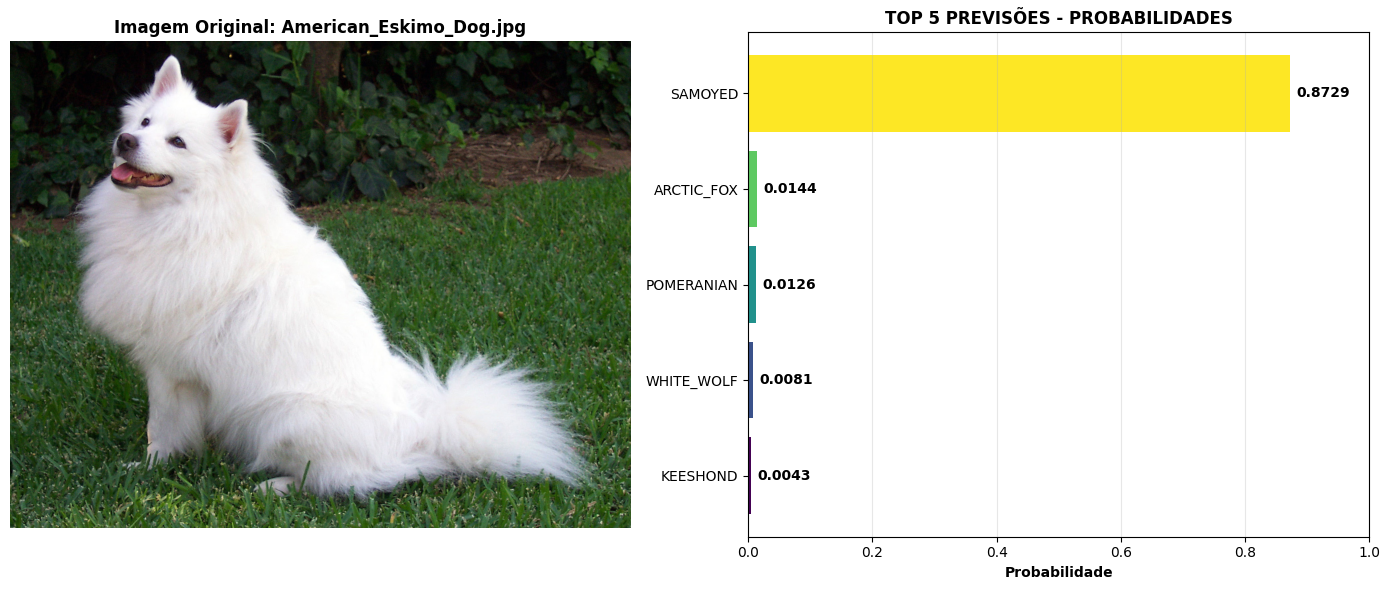


IMAGEM: Cat03.jpg
TOP 5 PREVIS√ïES:
----------------------------------------
  1. TIGER_CAT: 0.8619 (86.19%)
  2. TABBY: 0.0901 (9.01%)
  3. EGYPTIAN_CAT: 0.0095 (0.95%)
  4. PLASTIC_BAG: 0.0026 (0.26%)
  5. TUB: 0.0013 (0.13%)


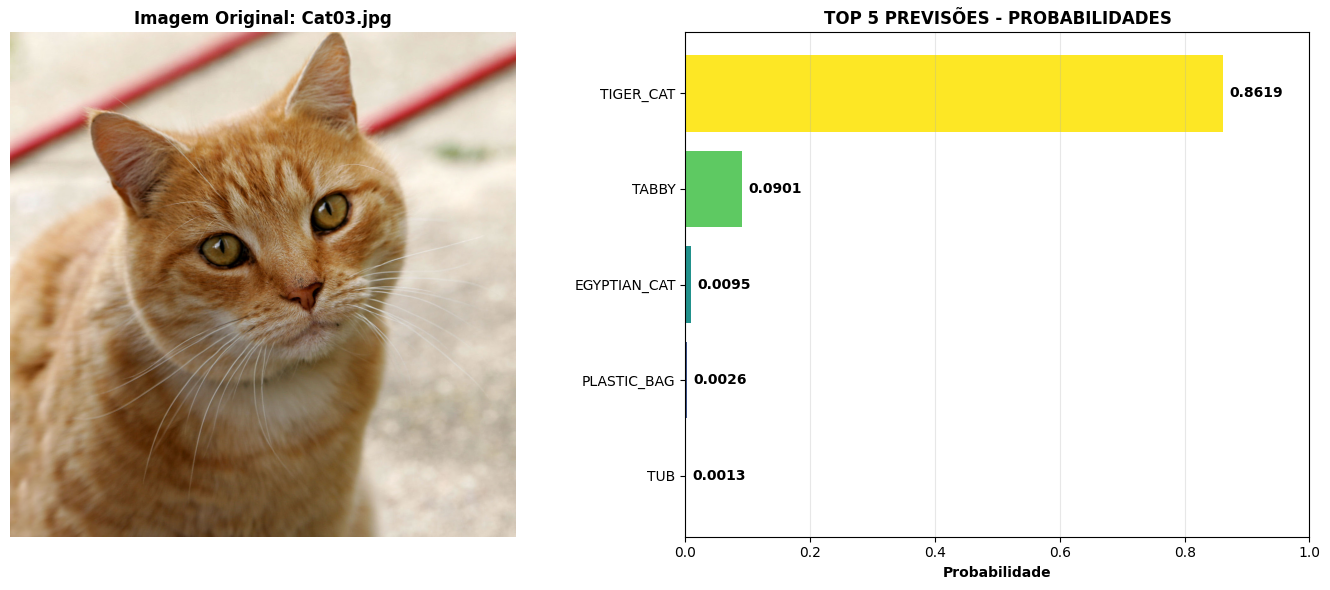


IMAGEM: Domestic_Goose.jpg
TOP 5 PREVIS√ïES:
----------------------------------------
  1. GOOSE: 0.9730 (97.30%)
  2. DRAKE: 0.0057 (0.57%)
  3. SPOONBILL: 0.0010 (0.10%)
  4. EUROPEAN_GALLINULE: 0.0008 (0.08%)
  5. ALBATROSS: 0.0006 (0.06%)


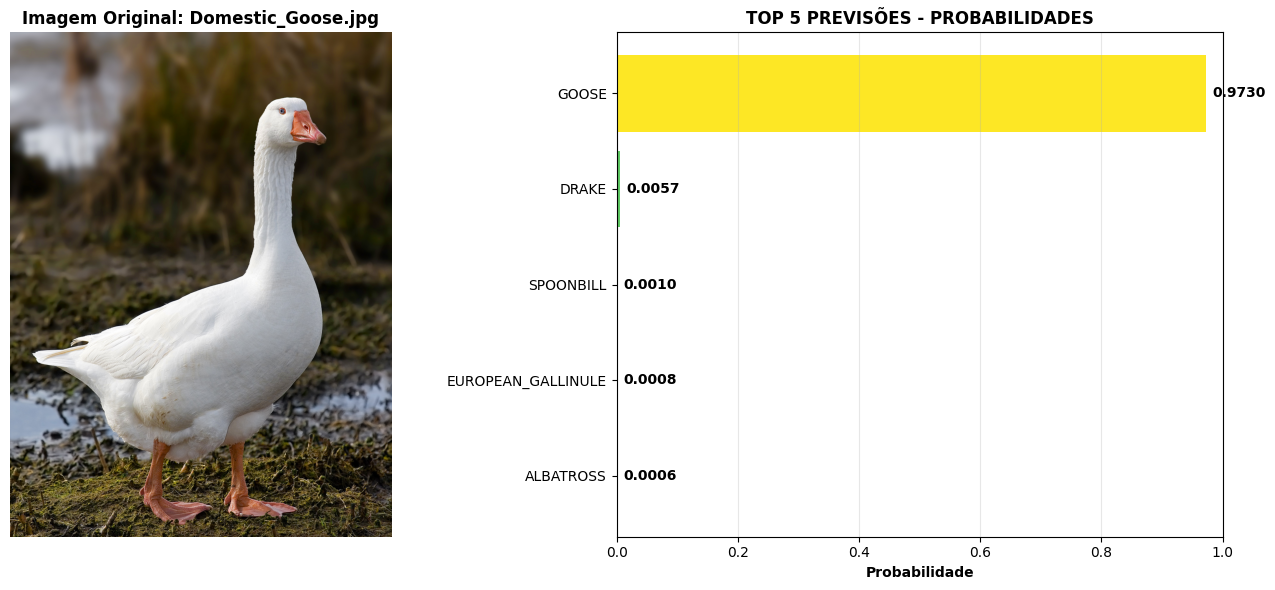


‚úÖ CLASSIFICA√á√ÉO CONCLU√çDA COM SUCESSO!

RESUMO DAS PREVIS√ïES PRINCIPAIS:
--------------------------------------------------
American_Eskimo_Dog.jpg   ‚Üí SAMOYED              (0.8729)
Cat03.jpg                 ‚Üí TIGER_CAT            (0.8619)
Domestic_Goose.jpg        ‚Üí GOOSE                (0.9730)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# A. Prepara√ß√£o das imagens
def load_and_preprocess_images(image_paths, target_size=(299, 299)):
    """
    Carrega e pr√©-processa imagens para o Inception V3
    """
    processed_images = []
    
    for img_path in image_paths:
        # Carregar imagem usando Keras
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        
        # Pr√©-processamento espec√≠fico para InceptionV3
        img_array = preprocess_input(img_array)
        
        processed_images.append(img_array)
    
    return np.array(processed_images)

# B. Carregar modelo pr√©-treinado
def load_inception_model():
    """
    Carrega o modelo Inception V3 pr√©-treinado
    """
    # Carregar modelo com pesos pr√©-treinados no ImageNet
    model = InceptionV3(weights='imagenet')
    return model

# C. Classifica√ß√£o das imagens
def classify_images(image_paths):
    """
    Classifica imagens usando Inception V3
    """
    # Verificar se as imagens existem
    valid_paths = []
    for path in image_paths:
        if os.path.exists(path):
            valid_paths.append(path)
        else:
            print(f"Aviso: Imagem n√£o encontrada - {path}")
    
    if not valid_paths:
        print("Nenhuma imagem v√°lida para classificar.")
        return None
    
    print(f"Processando {len(valid_paths)} imagens...")
    
    # Pr√©-processar imagens
    images = load_and_preprocess_images(valid_paths)
    
    # Carregar modelo
    print("Carregando modelo Inception V3...")
    model = load_inception_model()
    
    # Fazer previs√µes
    print("Fazendo previs√µes...")
    predictions = model.predict(images)
    
    # Decodificar previs√µes
    decoded_predictions = decode_predictions(predictions, top=5)
    
    # Exibir resultados
    for i, img_path in enumerate(valid_paths):
        print(f"\n{'='*60}")
        print(f"IMAGEM: {os.path.basename(img_path)}")
        print("TOP 5 PREVIS√ïES:")
        print("-" * 40)
        
        for j, (imagenet_id, label, score) in enumerate(decoded_predictions[i]):
            print(f"  {j+1}. {label.upper()}: {score:.4f} ({score*100:.2f}%)")
        
        # Exibir imagem
        plt.figure(figsize=(14, 6))
        
        # Imagem original
        plt.subplot(1, 2, 1)
        original_img = mpimg.imread(img_path)
        plt.imshow(original_img)
        plt.title(f"Imagem Original: {os.path.basename(img_path)}", fontsize=12, fontweight='bold')
        plt.axis('off')
        
        # Gr√°fico de barras das previs√µes
        plt.subplot(1, 2, 2)
        labels = [pred[1] for pred in decoded_predictions[i]]
        scores = [pred[2] for pred in decoded_predictions[i]]
        
        colors = plt.cm.viridis(np.linspace(0, 1, 5))
        bars = plt.barh(range(5), scores[::-1], color=colors)
        
        # Adicionar valores nas barras
        for idx, (bar, score) in enumerate(zip(bars, scores[::-1])):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{score:.4f}', va='center', ha='left', fontweight='bold')
        
        plt.yticks(range(5), [label.upper() for label in labels[::-1]])
        plt.title("TOP 5 PREVIS√ïES - PROBABILIDADES", fontsize=12, fontweight='bold')
        plt.xlabel("Probabilidade", fontweight='bold')
        plt.xlim(0, 1)
        plt.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return decoded_predictions

# D. Fun√ß√£o para verificar e carregar imagens espec√≠ficas
def load_specific_images():
    """
    Carrega as imagens espec√≠ficas mencionadas
    """
    image_files = ["American_Eskimo_Dog.jpg", "Cat03.jpg", "Domestic_Goose.jpg"]
    found_images = []
    
    print("Procurando imagens espec√≠ficas...")
    for img_file in image_files:
        if os.path.exists(img_file):
            found_images.append(img_file)
            print(f"‚úì Encontrada: {img_file}")
        else:
            print(f"‚úó N√£o encontrada: {img_file}")
    
    return found_images

# E. Fun√ß√£o para mostrar informa√ß√µes das imagens
def show_image_info(image_paths):
    """
    Mostra informa√ß√µes b√°sicas sobre as imagens
    """
    print("\n" + "="*60)
    print("INFORMA√á√ïES DAS IMAGENS")
    print("="*60)
    
    for path in image_paths:
        if os.path.exists(path):
            img = mpimg.imread(path)
            print(f"Imagem: {os.path.basename(path)}")
            print(f"  Dimens√µes: {img.shape[0]} x {img.shape[1]}")
            print(f"  Canais: {img.shape[2] if len(img.shape) > 2 else 1}")
            print(f"  Tamanho do arquivo: {os.path.getsize(path) / 1024:.1f} KB")
            print("-" * 40)

# Execu√ß√£o principal
if __name__ == "__main__":
    print("CLASSIFICA√á√ÉO DE IMAGENS COM INCEPTION V3")
    print("=" * 60)
    
    # Carregar as imagens espec√≠ficas
    image_paths = load_specific_images()
    
    if not image_paths:
        print("\n‚ùå Nenhuma das imagens espec√≠ficas foi encontrada.")
        print("Verifique se os arquivos est√£o no mesmo diret√≥rio:")
        print("  - American_Eskimo_Dog.jpg")
        print("  - Cat03.jpg") 
        print("  - Domestic_Goose.jpg")
        exit()
    
    # Mostrar informa√ß√µes das imagens
    show_image_info(image_paths)
    
    # Classificar as imagens
    print("\n" + "="*60)
    print("INICIANDO CLASSIFICA√á√ÉO...")
    print("="*60)
    
    predictions = classify_images(image_paths)
    
    if predictions:
        print("\n" + "="*60)
        print("‚úÖ CLASSIFICA√á√ÉO CONCLU√çDA COM SUCESSO!")
        print("="*60)
        
        # Resumo das previs√µes top-1
        print("\nRESUMO DAS PREVIS√ïES PRINCIPAIS:")
        print("-" * 50)
        for i, path in enumerate(image_paths):
            top_pred = predictions[i][0]  # Previs√£o top-1
            print(f"{os.path.basename(path):25} ‚Üí {top_pred[1].upper():20} ({top_pred[2]:.4f})")

9. Transfer√™ncia de aprendizado para classifica√ß√£o de imagens grandes.

    A. Crie um conjunto de treinamento contendo pelo menos 100 imagens por classe. Por exemplo, voc√™ pode classificar suas pr√≥prias imagens com base no local (praia, montanha, cidade, etc.) ou, como alternativa, utilizar apenas um conjunto de dados existente como o conjunto de dados das flores (https://goo.gl/Eg/VXZ)
    
    B. Escreva uma etapa de pr√©-processamento que redimensionar√° e recortar√° a imagem em 299x299 com alguma aleatoriedade para o aumento de dados.
    
    C. Utilizando o modelo Inception v3 pr√©-treinado do exerc√≠cio anterior, congele todas as camadas at√© a camada de gargalo(ou seja, a √∫ltima camada antes da camada de sa√≠da) e substitua a camada de sa√≠da pelo n√∫mero apropriado de sa√≠das para sua nova tarefa de classifica√ß√£o (por exemplo, o conjunto de dados das flores tem cinco classes mutualmente exclusivas, ent√£o a camada de sa√≠da deve ter cinco neur√¥nios e utilizar a fun√ß√£o de ativa√ß√£o softmax).
    
    D. Divida seu conjunto de dados em um conjunto de treinamento e um conjunto de testes. Treine o modelo no conjunto de treinamento e o avalie no conjunto de testes.

üåª TRANSFER√äNCIA DE APRENDIZADO - FLOWERS DATASET
üå∫ Download do dataset de flores do Kaggle...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 205M/205M [00:08<00:00, 26.0MB/s] 

Extracting files...


‚úì Dataset baixado em: C:\Users\andre\.cache\kagglehub\datasets\imsparsh\flowers-dataset\versions\2
‚úì Imagens encontradas em: C:\Users\andre\.cache\kagglehub\datasets\imsparsh\flowers-dataset\versions\2
üìä Distribui√ß√£o das classes:
  test: 924 imagens
  train: 0 imagens
Found 2937 images belonging to 2 classes.
Found 733 images belonging to 2 classes.
‚öñÔ∏è Pesos das classes: {0: np.float64(1.9844594594594596), 1: np.float64(0.6684114701866181)}

üöÄ Iniciando treinamento...
üéØ Fase 1: Transfer Learning


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107s 1s/step - accuracy: 0.5335 - loss: 3.1548 - val_accuracy: 0.2524 - val_loss: 3.0727 - learning_rate: 1.0000e-04
Epoch 2/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110s 1s/step - accuracy: 0.5526 - loss: 3.0562 - val_accuracy: 0.2619 - val_loss: 3.6504 - learning_rate: 1.0000e-04
Epoch 3/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 117s 1s/step - accuracy: 0.5829 - loss: 2.9955 - val_accuracy: 0.2701 - val_loss: 3.8133 - learning_rate: 1.0000e-04
Epoch 4/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114s 1s/step - accuracy: 0.5809 - loss: 2.9466 - val_accuracy: 0.2688 - val_loss: 3.8704 - learning_rate: 1.0000e-04
Epoch 5/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 113s 1s/step - accuracy: 0.6010 - loss: 2.9034 - val_accuracy: 0.2742 - val_loss: 3.8837 - learning_rate: 5.0000e-05
Epoch 6/15
92/92 ‚îÅ‚îÅ‚î

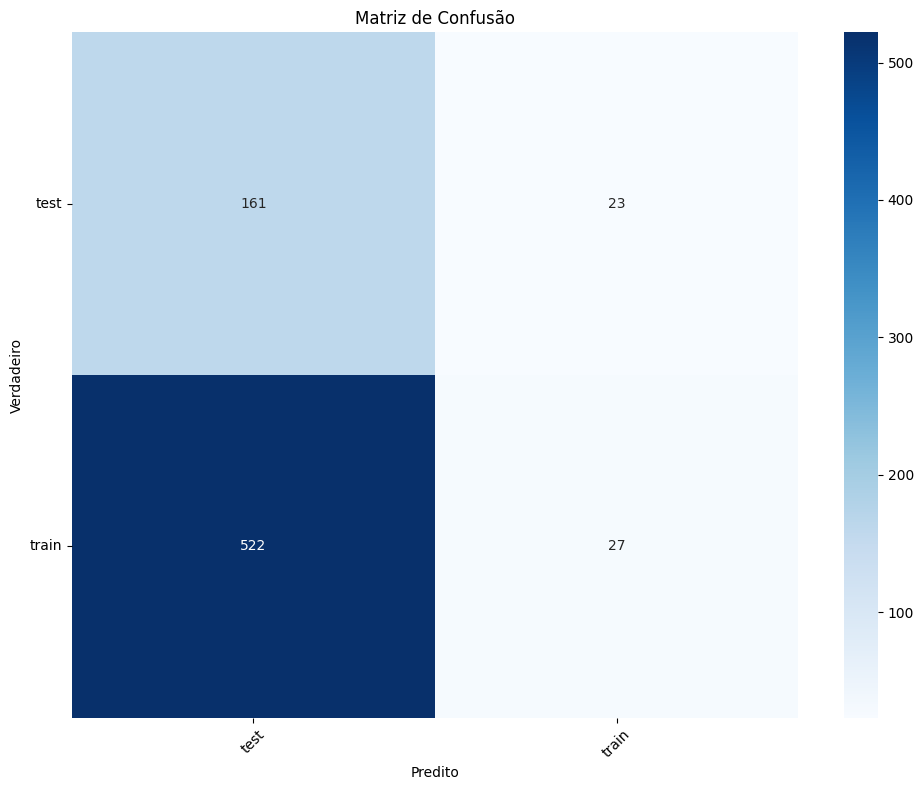

‚úì Modelo salvo como 'flowers_classification_model.h5'


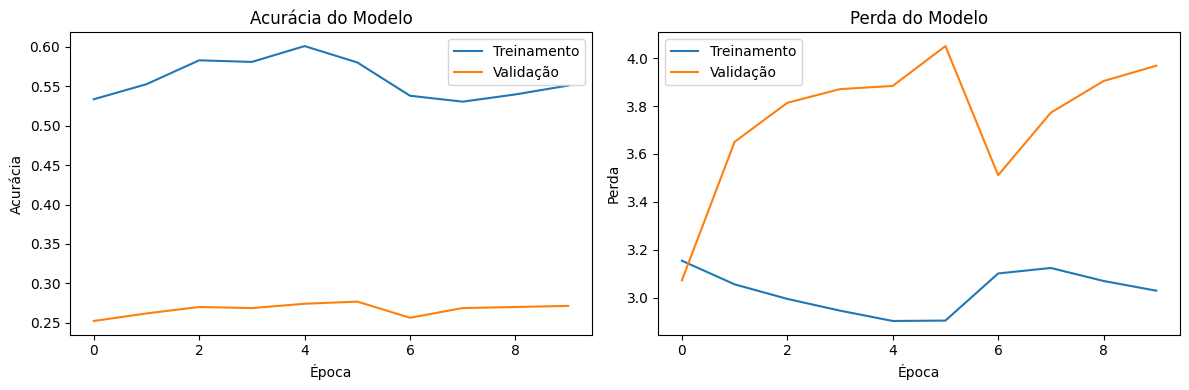

In [7]:
# Transfer√™ncia de Aprendizado com Flowers Dataset do Kaggle

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import shutil

# 1. Download e prepara√ß√£o do dataset do Kaggle
def download_kaggle_dataset():
    """
    Faz download do dataset de flores do Kaggle
    """
    print("üå∫ Download do dataset de flores do Kaggle...")
    try:
        # Download do dataset
        path = kagglehub.dataset_download("imsparsh/flowers-dataset")
        print(f"‚úì Dataset baixado em: {path}")
        
        # O dataset geralmente vem em uma estrutura zipada, vamos encontrar as imagens
        dataset_path = find_flowers_images(path)
        return dataset_path
        
    except Exception as e:
        print(f"‚ùå Erro no download do dataset: {e}")
        print("Tentando usar dataset local como fallback...")
        return "flower_photos"  # Fallback para dataset local

def find_flowers_images(base_path):
    """
    Encontra o diret√≥rio com as imagens de flores
    """
    # Procurar por diret√≥rios comuns que cont√™m imagens
    possible_paths = [
        base_path,
        os.path.join(base_path, "flowers"),
        os.path.join(base_path, "flower_photos"),
        os.path.join(base_path, "data"),
        os.path.join(base_path, "images"),
    ]
    
    for path in possible_paths:
        if os.path.exists(path) and any(os.path.isdir(os.path.join(path, d)) for d in os.listdir(path)):
            print(f"‚úì Imagens encontradas em: {path}")
            return path
    
    # Se n√£o encontrar, criar estrutura a partir do conte√∫do
    return create_flowers_structure(base_path)

def create_flowers_structure(base_path):
    """
    Cria estrutura organizada a partir do dataset baixado
    """
    print("Organizando estrutura do dataset...")
    target_dir = "organized_flowers"
    os.makedirs(target_dir, exist_ok=True)
    
    # Mapeamento de classes comuns
    class_mapping = {
        'daisy': ['daisy', 'daisy_'],
        'dandelion': ['dandelion', 'dandelion_'],
        'rose': ['rose', 'roses', 'rose_'],
        'sunflower': ['sunflower', 'sunflowers', 'sunflower_'],
        'tulip': ['tulip', 'tulips', 'tulip_']
    }
    
    # Procurar e organizar imagens
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                
                # Tentar classificar baseado no nome do arquivo
                found_class = None
                for cls, keywords in class_mapping.items():
                    if any(keyword in file.lower() for keyword in keywords):
                        found_class = cls
                        break
                
                if found_class:
                    class_dir = os.path.join(target_dir, found_class)
                    os.makedirs(class_dir, exist_ok=True)
                    shutil.copy2(file_path, os.path.join(class_dir, file))
    
    print(f"‚úì Dataset organizado em: {target_dir}")
    return target_dir

# 2. An√°lise do dataset
def analyze_dataset(data_dir):
    """
    Analisa o dataset e verifica balanceamento
    """
    classes = []
    class_counts = {}
    
    if os.path.exists(data_dir):
        classes = [d for d in os.listdir(data_dir) 
                  if os.path.isdir(os.path.join(data_dir, d))]
    
    for cls in classes:
        cls_path = os.path.join(data_dir, cls)
        image_files = [f for f in os.listdir(cls_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[cls] = len(image_files)
    
    print("üìä Distribui√ß√£o das classes:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count} imagens")
    
    return class_counts, classes

# 3. Data augmentation e geradores
def create_data_generators(data_dir, batch_size=32, img_size=(299, 299)):
    """
    Cria geradores de dados com balanceamento
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range=0.3,
        shear_range=0.2,
        brightness_range=[0.7, 1.3],
        fill_mode='reflect',
        validation_split=0.2
    )
    
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42
    )
    
    validation_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=42
    )
    
    # Calcular class weights
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    
    class_weights_dict = dict(enumerate(class_weights))
    print("‚öñÔ∏è Pesos das classes:", class_weights_dict)
    
    return train_generator, validation_generator, class_weights_dict

# 4. Model architecture
def create_model(num_classes):
    """
    Cria modelo InceptionV3 com transfer learning
    """
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299, 3)
    )
    
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.6),
        layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model, base_model

# 5. Training function
def train_model(model, base_model, train_generator, validation_generator, class_weights):
    """
    Treina o modelo em duas fases
    """
    # Phase 1: Transfer Learning
    print("üéØ Fase 1: Transfer Learning")
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=3)
    ]
    
    history_phase1 = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=1
    )
    
    # Phase 2: Fine-tuning
    print("üéØ Fase 2: Fine-tuning")
    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False
    
    model.compile(
        optimizer=Adam(learning_rate=0.00001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history_phase2 = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=1,
        initial_epoch=len(history_phase1.history['accuracy'])
    )
    
    # Combine histories
    combined_history = {
        'accuracy': history_phase1.history['accuracy'] + history_phase2.history['accuracy'],
        'val_accuracy': history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'],
        'loss': history_phase1.history['loss'] + history_phase2.history['loss'],
        'val_loss': history_phase1.history['val_loss'] + history_phase2.history['val_loss']
    }
    
    return model, combined_history

# 6. Evaluation
def evaluate_model(model, validation_generator, classes):
    """
    Avalia√ß√£o detalhada do modelo
    """
    validation_generator.reset()
    y_pred = model.predict(validation_generator, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes
    
    print("\nüìä Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_true, y_pred_classes, target_names=classes, digits=4))
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confus√£o')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 7. Main execution
def main():
    print("üåª TRANSFER√äNCIA DE APRENDIZADO - FLOWERS DATASET")
    print("=" * 60)
    
    # Download dataset
    data_dir = download_kaggle_dataset()
    
    # Analyze dataset
    class_counts, classes = analyze_dataset(data_dir)
    num_classes = len(classes)
    
    if num_classes == 0:
        print("‚ùå Nenhuma classe encontrada. Verifique a estrutura do dataset.")
        return
    
    # Create data generators
    train_generator, validation_generator, class_weights = create_data_generators(data_dir)
    
    # Create model
    model, base_model = create_model(num_classes)
    
    # Train model
    print("\nüöÄ Iniciando treinamento...")
    model, history = train_model(model, base_model, train_generator, validation_generator, class_weights)
    
    # Evaluate
    print("\n‚úÖ Avaliando modelo...")
    test_loss, test_acc = model.evaluate(validation_generator, verbose=0)
    print(f"Acur√°cia final: {test_acc:.4f}")
    
    evaluate_model(model, validation_generator, classes)
    
    # Save model
    model.save('flowers_classification_model.h5')
    print("‚úì Modelo salvo como 'flowers_classification_model.h5'")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Treinamento')
    plt.plot(history['val_accuracy'], label='Valida√ß√£o')
    plt.title('Acur√°cia do Modelo')
    plt.xlabel('√âpoca')
    plt.ylabel('Acur√°cia')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Treinamento')
    plt.plot(history['val_loss'], label='Valida√ß√£o')
    plt.title('Perda do Modelo')
    plt.xlabel('√âpoca')
    plt.ylabel('Perda')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Install kagglehub if not available
    try:
        import kagglehub
    except ImportError:
        print("üì¶ Instalando kagglehub...")
        import subprocess
        subprocess.check_call(["pip", "install", "kagglehub"])
        import kagglehub
    
    main()